In [1]:
#from pathlib import Path
import os
from natsort import natsorted, ns
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [2]:
n_images=500
train_dir = 'Train' # image folder

# get the list of jpegs from sub image class folders
rose_imgs = [fn for fn in os.listdir(f'{train_dir}/rose') if fn.endswith('.jpg')]
tulip_imgs = [fn for fn in os.listdir(f'{train_dir}/tulip') if fn.endswith('.jpg')]
daisy_imgs = [fn for fn in os.listdir(f'{train_dir}/daisy') if fn.endswith('.jpg')]
sunflower_imgs = [fn for fn in os.listdir(f'{train_dir}/Sunflower') if fn.endswith('.jpg')]

dandelion_imgs = [fn for fn in os.listdir(f'{train_dir}/dandelion') if fn.endswith('.jpg')]

# randomly select 3 of each
select_rose = np.random.choice(rose_imgs, n_images, replace = False)
select_sunflower = np.random.choice(sunflower_imgs, n_images, replace = False)
select_tulip = np.random.choice(tulip_imgs, n_images, replace = False)
select_dandelion = np.random.choice(dandelion_imgs, n_images, replace = False)
select_daisy = np.random.choice(daisy_imgs, n_images, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (20,15))
for i in range(15):
    if i < n_images:
        fp = f'{train_dir}/rose/{select_rose[i]}'
        label = 'rose'
    elif i<2*n_images:
        fp = f'{train_dir}/sunflower/{select_sunflower[i-3]}'
        label = 'sunflower'
    elif i<3*n_images:
        fp = f'{train_dir}/tulip/{select_tulip[i-6]}'
        label = 'tulip'
    elif i<4*n_images:
        fp = f'{train_dir}/dandelion/{select_dandelion[i-9]}'
        label = 'dandelion'
    elif i<5*n_images:
        fp = f'{train_dir}/daisy/{select_daisy[i-12]}'
        label = 'daisy'
   # ax = fig.add_subplot(5, n_images, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
 #   plt.imshow(fn, cmap='Greys_r')
 #   plt.title(label)
  #  plt.axis('off')

<Figure size 1440x1080 with 0 Axes>

# Images as Matrix
For the next few steps, we will work directly with the pixel values of each image so we can do operations on them. We can accomplish this by converting our images into a Numpy array.

In [3]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

This function will iterate through each file and turn them into an (n, m) matrix, where n is the number of observations and m is the number of pixels.

In [4]:
#list of file names= flower_imgs ,path= f'{train_dir}/flower'

In [5]:
import time
start=time.time()
full_mat_rose=img2np(f'{train_dir}/rose/', rose_imgs, size = (64, 64))
full_mat_tulip=img2np(f'{train_dir}/tulip/', tulip_imgs, size = (64, 64))
full_mat_daisy=img2np(f'{train_dir}/daisy/', daisy_imgs, size = (64, 64))
full_mat_dandelion=img2np(f'{train_dir}/dandelion/', dandelion_imgs, size = (64, 64))
full_mat_sunflower=img2np(f'{train_dir}/sunflower/', sunflower_imgs, size = (64, 64))
end=time.time()
print(end-start)


37.75711750984192


# Average Image
Now let’s see what the average image looks like for each class. To compute the average image, we can take the average value of each pixel across all observations.

In [6]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
   # plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
   # plt.title(f'Average {title}')
   # plt.axis('off')
   # plt.savefig(f'Average {title}.pdf')
   # plt.show()
    
    return mean_img



In [7]:
#title=flower

In [8]:
import time
start=time.time()
rose_mean = find_mean_img(full_mat_rose, 'rose');
daisy_mean = find_mean_img(full_mat_daisy, 'daisy');
tulip_mean = find_mean_img(full_mat_tulip, 'tulip');
sunflower_mean = find_mean_img(full_mat_sunflower, 'sunflower');
dandelion_mean = find_mean_img(full_mat_dandelion, 'dandelion');
end=time.time()
print(end-start)

0.01250457763671875


In [9]:
len(rose_mean)

64

# Contrast Between Average Images
Using the average images, we can also compute the difference.

In [10]:
categories=['rose','tulip','dandelion','daisy','sunflower']
Mean=[rose_mean,tulip_mean,dandelion_mean,daisy_mean,sunflower_mean]

In [11]:
Contrast_mean=[]
Index=[]
for i in range(0,len(categories)):
    for j in range(0,len(categories)):
        a=Mean[i]-Mean[j]
        Index.append([i,j])
        Contrast_mean.append(a)
    
#Contrast_mean=np.array(Contrast_mean).reshape(len(categories),len(categories))

In [12]:
len(rose_mean[0])

64

In [13]:
plt.close()

from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("Difference_between_image_matrix.pdf")
for i in range(0,len(Contrast_mean)-1):
    contrast_mean=Contrast_mean[i]
    fig=plt.figure()
    plt.imshow(contrast_mean, cmap='bwr')
    plt.title(f'Difference Between {categories[Index[i][0]]} and {categories[Index[i][1]]} Averages')
    plt.axis('off')
    pdf.savefig()

#plt.show()
pdf.close()

# Variability
Similarly, we can also look at which area is most variable in either class by computing variance or standard deviation instead of the mean. Here the lighter area indicates higher variability.

In [14]:
rose_mean.shape

(64, 64)

In [15]:
def find_std_img(full_mat, title, size = (64, 64)):
    # calculate the average
    std_img = np.std(full_mat, axis = 0)
    # reshape it back to a matrix
    std_img = std_img.reshape(size)
    #plt.imshow(std_img, vmin=0, vmax=255, cmap='Greys_r')
    #plt.title(f'Average {title}')
    #plt.axis('off')
    #plt.savefig(f'Std {title}.pdf')
    #plt.show()
    
    return std_img

In [16]:
rose_std = find_std_img(full_mat_rose, 'rose')
daisy_std = find_std_img(full_mat_daisy, 'daisy')
tulip_std = find_std_img(full_mat_tulip, 'tulip')
sunflower_std = find_std_img(full_mat_sunflower, 'sunflower')
dandelion_std = find_std_img(full_mat_dandelion, 'dandelion')

# Eigenimages
Lastly, we can use a dimension reduction technique such as the principal component analysis (PCA) to visualize the components that describe each class the best. The eigenimages, which is essentially the eigenvectors (components) of PCA of our image matrix, can be reshaped into a matrix and be plotted. It’s also called eigenfaces as this approach was first used for facial recognition research. Here we will visualize the principal components that describe 70% of variability for each class.

In [17]:
clear PCA

In [381]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    X = pca.transform(full_mat)
    print('Number of PC: ', pca.n_components_)
    return X
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
#plot_pca(eigenimages(full_mat_rose, 'rose'));
#plot_pca(eigenimages(full_mat_sunflower, 'sunflower'));
#plot_pca(eigenimages(full_mat_daisy, 'daisy'));
#plot_pca(eigenimages(full_mat_tulip, 'tulip'));
#plot_pca(eigenimages(full_mat_dandelion, 'dandelion'));

rose_pca=eigenimages(full_mat_rose, 'rose')
sunflower_pca=eigenimages(full_mat_sunflower, 'sunflower')
daisy_pca=eigenimages(full_mat_daisy, 'daisy')
tulip_pca=eigenimages(full_mat_tulip, 'tulip')
dandelion_pca=eigenimages(full_mat_dandelion, 'dandelion')


Number of PC:  34
Number of PC:  69
Number of PC:  39
Number of PC:  70
Number of PC:  21


In [19]:
Class=( 'rose','sunflower','tulip','dandelion','daisy')*64

In [347]:
rose_mean.flatten()[2]

89.29082

In [20]:
Pixel_means=[]
Pixel_std=[]
#PCA_Transform=[]

j,k,l,m,o=0,0,0,0,0
for i in range(len(Class)):
    
    if Class[i]=='rose':
        
        a=rose_mean.flatten()[i]
        b=rose_std.flatten()[i]
        #c=rose_pca.flatten()[i]
        j=j+1
    if Class[i]=='sunflower':
        a=sunflower_mean.flatten()[i]
        b=sunflower_std.flatten()[i]
       # c=sunflower_pca.flatten()[i]
        k=k+1
    if Class[i]=='tulip':
        a=tulip_mean.flatten()[i]
        b=tulip_std.flatten()[i]
        #c=tulip_pca.flatten()[i]
        l=l+1
    if Class[i]=='dandelion':
        a=dandelion_mean.flatten()[i]
        b=dandelion_std.flatten()[i]
       # c=dandelion_pca.flatten()[i]
        m=m+1
    if Class[i]=='daisy':
        a=daisy_mean.flatten()[i]
        b=daisy_std.flatten()[i]
        #c=daisy_pca.flatten()[i]
        o=o+1

    Pixel_means.append(a)
    Pixel_std.append(b)
   # PCA_Transform.append(c)
    

    

In [21]:
Features=Class
Features=pd.DataFrame(Features);


In [22]:
Features=Features.rename(columns={0:'Class'});
Features['Pixel_mean']= Pixel_means;
Features['Pixel_std']= Pixel_std;
#Features['PCA_Transform']= PCA_Transform;

In [23]:
Features

,Class,Pixel_mean,Pixel_std
0,rose,86.875000,75.435577
1,sunflower,126.798363,72.217484
2,tulip,104.814026,71.548332
3,dandelion,89.167297,68.771095
4,daisy,85.648895,73.924133
...,...,...,...
315,rose,93.322701,72.551552
316,sunflower,127.149864,71.642448
317,tulip,107.262192,73.337624
318,dandelion,88.057983,64.712532


In [352]:
import seaborn as sns

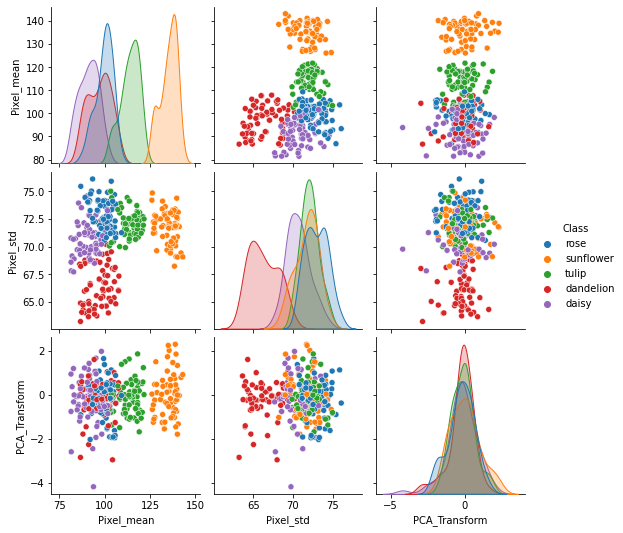

In [372]:
import seaborn as sns
sns_plot=sns.pairplot(Features, hue="Class")
sns_plot.savefig('pairplot.png')


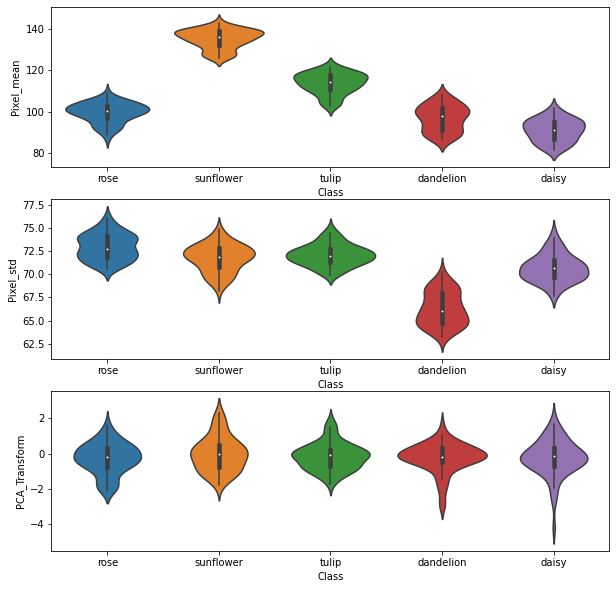

In [373]:
fig, ((ax1,ax2,ax3)) = plt.subplots(3,1, figsize=(10, 10))
sns.violinplot(x="Class", y="Pixel_mean", data=Features, ax=ax1)
sns.violinplot(x="Class", y="Pixel_std", data=Features, ax=ax2)
sns.violinplot(x="Class", y="PCA_Transform", data=Features, ax=ax3)

plt.savefig('violinplot.png')

# 1. k-Nearest Neighbor aka classifies objects based on feature similarity

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [29]:
# 1. declare the classifier
# n-neighbors is the number of closest neighbors we consider when voting

knn=KNeighborsClassifier(n_neighbors=3) # find ideal k

#2. prepare the unput variable x and target output y

x,y =Features.drop(['Class'],axis=1),Features['Class'] # we want the input space to only be the features of the flowers

#print(x)
#3. Split the dataset into two parts, the training set and the test set
x_test,x_train,y_test,y_train= train_test_split(x,y,test_size=0.3, random_state=1)

# 4. Fit the model using the training data

knn.fit(x_train,y_train)

# 5. make predictions with the input from the test data

prediction=knn.predict(x_test)

import pickle

# save the model to disk
filename = '5_flowers_knn.sav'
pickle.dump(knn, open(filename, 'wb'))

print('kNN(k=3) accuracy is :',knn.score(x_test,y_test))



kNN(k=3) accuracy is : 0.8616071428571429


# 2. Naive Bayes(NB)


In [357]:
#Bayes theorem - assumes posterior probabilities independent of one another

In [27]:
#Step 1: We convert the data to a frequency table

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

nb=GaussianNB()

x,y =Features.drop(['Class'],axis=1),Features['Class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

nb.fit(x_train,y_train)

prediction= nb.predict(x_test)

import pickle

# save the model to disk
filename = '5_flowers_nb.sav'
pickle.dump(nb, open(filename, 'wb'))

print('NB accuracy:',nb.score(x_test,y_test))

#Step 2: We calculate the probability of each outcome P(c), 
#each weather condition P(x), and the likelihood P(x|c)
#Step 3: We can then plug in the numbers into the NB equation 
#above to calculate the probability of each outcome (class) given some weather condition P(c|x). Assign the object to the class with the highest probability

NB accuracy: 0.890625


In [384]:
# 3. Decision Tree 

In [387]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtree = DecisionTreeClassifier()
x,y =Features.drop(['Class'],axis=1),Features['Class']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)


dtree.fit(x_train,y_train)

predictor= dtree.predict(x_test)

print('dtree accuracy:',dtree.score(x_test,y_test))

dtree accuracy: 0.84375


In [361]:
from sklearn import tree
tree.export_graphviz(dtree, out_file="tree.dot")
# Then at terminal first install dot:
# brew install graphviz
# and then convert to png:
# dot -Tpng tree.dot -o tree.png

In [362]:
##we might observe some leaves with only 1 or 2 samples. To avoid that, we could put these constrains to the decision tree:

##Minimum samples for a node split and each terminal node
##Maximum depth of tree
##Maximum number of nodes
##Maximum features to consider to split

In [382]:
dtree= DecisionTreeClassifier(max_depth=5,min_samples_split=5,min_samples_leaf=5) # these are not the ideal hyperparameters, find them

dtree.fit(x_train,y_train)

predictions= dtree.predict(x_test)

print('Random Forrest accuracy:',dtree.score(x_test,y_test))


Random Forrest accuracy: 0.90625


In [364]:
# 4. Support Vector Machine (SVM)

In [365]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

In [366]:
# Parameters of SVM¶ #support vector machine
## There are three main parameters which we could play with when constructing a SVM classifier:

### Type of kernel
### Gamma value
### C value

In [367]:
X,y=Features.iloc[:,1:3], pd.factorize(Features['Class'])[0]

# Define the boundaries for the graphs we will draw later
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [368]:
# Defining a function that declare a SVM classifier, with different parameters, and make predictions
def make_mesh(kerneltype, Cval, gammaval="auto"):
    svc = SVC(kernel=kerneltype, C=Cval,gamma=gammaval)
    svc.fit(X, y)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return (Z)

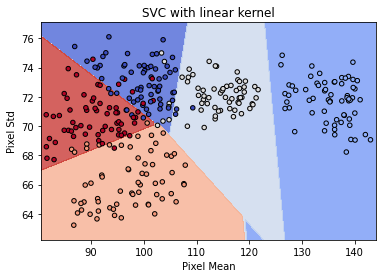

In [374]:
Z = make_mesh("linear", 1, gammaval="auto")
plt.subplot(1, 1, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
plt.xlabel('Pixel Mean')
plt.ylabel('Pixel Std')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.savefig('SVC_linear.png')

# Next Steps: 
## $\bullet$ do with all datasets , FIND IDEAL HYPER PARAMETERS FOR ALL MODELS
## $\bullet$ change train_test_split to other model selection: covered in lecture 7/8/2021
## $\bullet$ use pre-trained Neural Network
